In [2]:
import urllib.request # urllib 모듈 호출
import re

url = "https://www.google.com/googlebooks/uspto-patents-grants-text.html" #url 값 입력

html = urllib.request.urlopen(url)  #url 열기
html_contents = str(html.read().decode("cp949")) # html 파일 읽고, 문자열로 반환

#print(html_contents)


url_list = re.findall(r"(http)(.+)(zip)", html_contents)

for url in url_list:
    print("".join(url)) #출력된 Tuple 형태 데이터 str으로 join

http://storage.googleapis.com/patents/grant_full_text/2015/ipg150106.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150113.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150120.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150127.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150203.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150210.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150217.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150224.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150303.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150310.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150317.zip
http://storage.googleapis.com/patents/grant_full_text/2014/ipg140107.zip
http://storage.googleapis.com/patents/grant_full_text/2014/ipg140114.zip
http://storage.googleapis.com/patents/grant_full_te

In [3]:
import urllib.request
import re
url ="https://finance.naver.com/item/main.nhn?code=207940"
html = urllib.request.urlopen(url)
html_contents = str(html.read().decode("ms949")) 
                    
stock_results = re.findall("(\<dl class=\"blind\"\>)([\s\S]+?)(\<\/dl\>)", html_contents)
# print(len(stock_results))
samsung_stock = stock_results[0] # 두개 tuple 값 중 첫번째 패턴
# print(samsung_stock)
samsung_index = samsung_stock[1] # 세 개의 tuple 값 중 두번째 값 # 하나의 괄호가 tuple index가 됨
# print(samsung_index)                    
index_list = re.findall("(\<dd\>)([\s\S]+?)(\<\/dd\>)", samsung_index) #regular 표현방법.
                    
for index in index_list:
    print(index[1].split()) #세 개의 tuple 값 중 두번째 값
                    

['2019년', '11월', '06일', '10시', '52분', '기준', '장중']
['종목명', '삼성바이오로직스']
['종목코드', '207940', '코스피']
['현재가', '400,000', '전일대비', '상승', '500', '플러스', '0.13', '퍼센트']
['전일가', '399,500']
['시가', '399,500']
['고가', '402,500']
['상한가', '519,000']
['저가', '398,500']
['하한가', '280,000']
['거래량', '25,410']
['거래대금', '10,173백만']


In [4]:
# -*- coding: utf-8 -*-
import requests
from bs4 import BeautifulSoup
import re

req = requests.get('https://www.melon.com/chart')
html = req.content
soup = BeautifulSoup(html, 'lxml') # pip install lxml
list_song = soup.find_all(name="a", attrs={"class":"title"})
list_artist = soup.find_all(name="a", attrs={"class":"artist"})


# 곡명 추출
for index in range(0, len(list_song)):
    title = list_song[index].find('a').text
    print(index+1, ' : ', title)
    if index == 100:
        break

# 피처링 제거
for index in range(0, len(list_song)):
    title = list_song[index].find('a').text
    print(index+1, ' : ', title.split("(")[0])
    if index == 100:
        break

# csv로 저장
import csv

with open('bugs_chart.csv', 'w', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(['rank', 'song', 'artist'])
    for index in range(0, len(list_song)):
        title = list_song[index].find('a').text
        artist = list_artist[index].find('a').text
        writer.writerow([index+1, title, artist])
        if index == 100:
            break

# 저장된 파일 pd로 읽기
import pandas as pd
datas = pd.read_csv('bugs_chart.csv')

In [5]:
# 저장된 파일 pd로 읽기
import pandas as pd
datas = pd.read_csv('bugs_chart.csv')

In [7]:
!pip install pandas_datareader

In [8]:
from pandas_datareader import get_data_yahoo
start_date = '2013-01-01'
codes = ['KO', 'MS', '207940.KS', '066570.KS']
result = {}
for code in codes:
    result[code] = get_data_yahoo(code, start_date).Close

import pandas as pd
prices = pd.DataFrame(result)

prices = prices.fillna(method='ffill')
prices = prices.dropna()                
prices.to_csv('./stocks.csv', encoding="ms949")
prices.tail(5)

,KO,MS,207940.KS,066570.KS
Date,,,,
2019-10-31,54.430000,46.049999,398500.0,66900.0
2019-11-01,53.900002,47.330002,396000.0,67200.0
2019-11-04,53.139999,48.830002,401000.0,67100.0
2019-11-05,52.419998,48.750000,399500.0,68300.0
2019-11-06,52.419998,48.750000,399000.0,68500.0


In [7]:
# 저장된 CSV 파일을 사용한다
import pandas as pd
prices = pd.read_csv('./stocks.csv')
prices = prices.set_index('Date')
prices.head(3)
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1682 entries, 2013-01-02 to 2019-07-02
Data columns (total 4 columns):
KO           1682 non-null float64
MS           1682 non-null float64
005930.KS    1682 non-null float64
000660.KS    1682 non-null float64
dtypes: float64(4)
memory usage: 65.7 KB


# pandas로 분석

### 2 금융 시계열 데이터 전처리
데이터 분석을 위한 전처리 방법



## 01 가격 차이가 큰 시계열 데이터 비교하기
데이터 정규화 / 비정규화

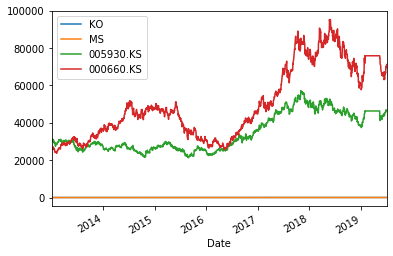

In [8]:
%matplotlib inline
prices.plot()

In [9]:
price = prices['005930.KS']
price[-5:]

Date
2019-06-26    45700.0
2019-06-27    46500.0
2019-06-28    47000.0
2019-07-01    46600.0
2019-07-02    46450.0
Name: 005930.KS, dtype: float64

In [10]:
price.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-07-01', '2019-07-02'],
              dtype='datetime64[ns]', name='Date', length=1682, freq=None)

In [11]:
price.index = pd.DatetimeIndex(price.index)
price.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-07-01', '2019-07-02'],
              dtype='datetime64[ns]', name='Date', length=1682, freq=None)

In [16]:
price["2013-10-03"] / price["2013-08-01"] - 1

0.10781250000000009

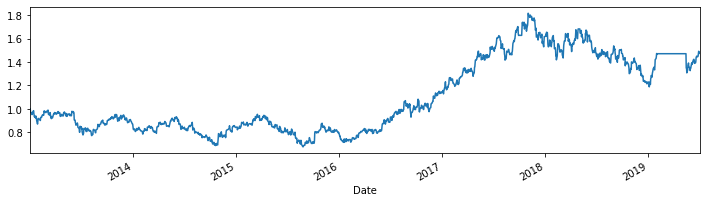

In [18]:
returns      = price.pct_change()
ret_price    = (1 + returns).cumprod()
ret_price[0] = 1

%matplotlib inline
ret_price.plot(figsize=(12,3))

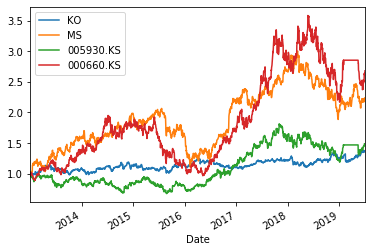

In [9]:
for col in prices.columns:
    pct_returns = prices[col].pct_change()
    pct_returns = (1 + pct_returns).cumprod()
    pct_returns[0] = 1
    pct_returns.plot(legend=True)

### #2 누적 수익률 계산 
.pct_change().cumprod()

In [20]:
month_returns = price.resample('BM').last().pct_change()
month_returns['2018']

Date
2018-01-31   -0.020801
2018-02-28   -0.056914
2018-03-30    0.045899
2018-04-30    0.076798
2018-05-31   -0.043396
2018-06-29   -0.079882
2018-07-31   -0.008574
2018-08-31    0.047568
2018-09-28   -0.041280
2018-10-31   -0.087191
2018-11-30   -0.012972
2018-12-31   -0.075269
Freq: BM, Name: 005930.KS, dtype: float64

In [21]:
m_ret = (1 + month_returns).cumprod()
m_ret['2019']

Date
2019-01-31    1.593577
2019-02-28    1.600483
2019-03-29    1.600483
2019-04-30    1.600483
2019-05-31    1.467541
2019-06-28    1.622928
2019-07-31    1.603936
Freq: BM, Name: 005930.KS, dtype: float64

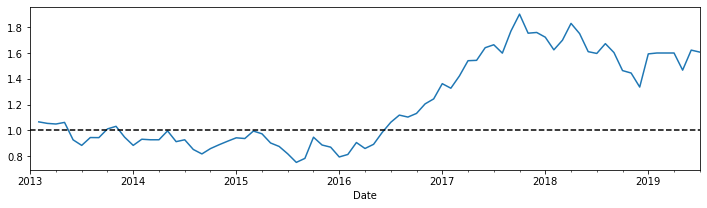

In [12]:
import matplotlib.pyplot as plt
m_ret.plot(figsize=(12,3))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

# 03 중간 배당데이터 추가하기
재귀적 연산

In [13]:
month_returns['2016-03-31'] += 0.003

In [14]:
for i in range(4):
    i += 10000
    print(i)

10000
10001
10002
10003


## 3 금융데이터 분석
pandas를 활용한 금융데이터 분석



##### 01 Introduction

In [15]:
prices.head(3)

,KO,MS,005930.KS,000660.KS
Date,,,,
2013-01-02,37.599998,19.620001,31520.0,26600.0
2013-01-03,37.599998,19.580000,30860.0,26650.0
2013-01-04,37.660000,20.190001,30500.0,26350.0


In [16]:
prices.describe()

,KO,MS,005930.KS,000660.KS
count,1682.000000,1682.000000,1682.000000,1682.000000
mean,42.921147,37.196350,34596.521998,50159.155767
std,3.006746,9.274216,9910.354392,19315.741039
min,36.840000,19.580000,21340.000000,23700.000000
25%,40.752500,30.132499,26160.000000,33100.000000
50%,42.430000,35.825001,29870.000000,45500.000000
75%,45.307501,44.387500,45400.000000,68375.000000
max,51.919998,58.910000,57220.000000,95300.000000


In [17]:
prices.describe().loc[ ['mean', 'std'] ,:]

,KO,MS,005930.KS,000660.KS
mean,42.921147,37.196350,34596.521998,50159.155767
std,3.006746,9.274216,9910.354392,19315.741039


In [18]:
prices.agg(['mean', 'std'])

,KO,MS,005930.KS,000660.KS
mean,42.921147,37.196350,34596.521998,50159.155767
std,3.006746,9.274216,9910.354392,19315.741039


In [19]:
prices_corr = prices.pct_change().dropna().corr()
prices_corr

,KO,MS,005930.KS,000660.KS
KO,1.000000,0.249493,0.034078,0.032667
MS,0.249493,1.000000,0.082999,0.110610
005930.KS,0.034078,0.082999,1.000000,0.381732
000660.KS,0.032667,0.110610,0.381732,1.000000


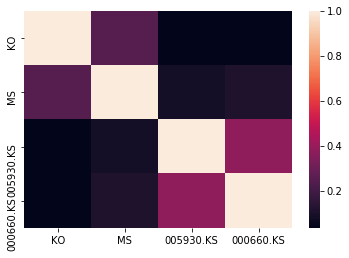

In [20]:
%matplotlib inline
import seaborn as sns
sns.heatmap(prices_corr)

### 2 Value At Risk
일일손실확률과 표준편차를 사용하여, 해당종목의 오차범위내 최대 손실금액

In [22]:
# 저장된 CSV 파일을 사용한다

import pandas as pd
prices = pd.read_csv('./data/stocks.csv')
prices = prices.set_index('Date')
prices.head(3)
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1682 entries, 2013-01-02 to 2019-07-02
Data columns (total 4 columns):
KO           1682 non-null float64
MS           1682 non-null float64
005930.KS    1682 non-null float64
000660.KS    1682 non-null float64
dtypes: float64(4)
memory usage: 65.7 KB


## 주가간의 상관관계 분석

In [23]:
prices_corr = prices.pct_change().dropna().corr()
prices_corr

,KO,MS,005930.KS,000660.KS
KO,1.000000,0.249493,0.034078,0.032667
MS,0.249493,1.000000,0.082999,0.110610
005930.KS,0.034078,0.082999,1.000000,0.381732
000660.KS,0.032667,0.110610,0.381732,1.000000


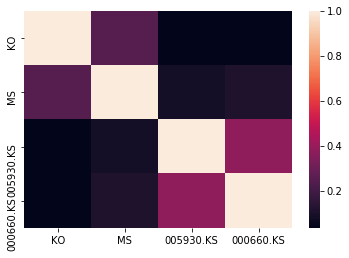

In [24]:
%matplotlib inline
import seaborn as sns
sns.heatmap(prices_corr)

In [25]:
# 초기자본금
p = 10e6
p

10000000.0

In [27]:
# 신뢰구간
c = 0.99

In [28]:
import pandas as pd
import numpy as np

In [29]:
prices.head(3)

,KO,MS,005930.KS,000660.KS
Date,,,,
2013-01-02,37.599998,19.620001,31520.0,26600.0
2013-01-03,37.599998,19.580000,30860.0,26650.0
2013-01-04,37.660000,20.190001,30500.0,26350.0


In [30]:
price = prices['000660.KS']

In [31]:
# 가격 변화의 평균
mu = np.mean(price)
mu

50159.15576694412

In [32]:
# 고정변동성
sigma = np.std(price)
sigma

19309.998288165003

In [33]:
from scipy.stats import norm

In [34]:
# 초과수익률
alpha = norm.ppf(1-c, mu, sigma)
alpha

5237.38230153919

In [35]:
def var_cov_var_one(P, c, prices):
    import numpy as np
    import pandas as pd
    from scipy.stats import norm
    
    result = []
    codes = prices.columns
    mu     = np.mean(price)
    sigma  = np.std(price)
    alpha  = norm.ppf( 1-c , mu , sigma )
    var    = P - P * ( alpha + 1 )
    return '000660.KS', round(var, 2), round(var/P * 100, 2)

In [36]:
df = var_cov_var_one(p,c,prices)
df

('000660.KS', -52373823015.39, -523738.23)

### 3 모든 종목의 VaR 계산

DataFrame

In [37]:
P    = 1e6                     # 1,000,000 원 (초기자금)
c    = 0.99                    # 99% 신뢰구간 (confidence interval)

In [38]:
def var_cov_var(P, c, prices):
    import numpy as np
    import pandas as pd
    from scipy.stats import norm
    
    result = []
    for code in prices.columns:
        price  = prices[code].pct_change()
        mu     = np.mean(price)
        sigma  = np.std(price)
        alpha  = norm.ppf( 1-c , mu , sigma )
        var    = P - P * ( alpha + 1 )
        result.append([code, c, round(var, 2), round(var/P * 100, 2)])

    df         = pd.DataFrame(result)
    df.columns = ['Code' ,'신뢰구간', '최대손실금액 (Value at Risk)', '리스크 비율']
    df         = df.sort_values('리스크 비율', ascending=True)
    return df

In [39]:
df = var_cov_var(P,c,prices)
df = df.sort_values('리스크 비율')
df

,Code,신뢰구간,최대손실금액 (Value at Risk),리스크 비율
0,KO,0.99,20625.41,2.06
2,005930.KS,0.99,35679.14,3.57
1,MS,0.99,37314.35,3.73
3,000660.KS,0.99,46840.87,4.68


## Rolling




##### 1 이동평균선을 활용한 매매 분석
Golden Cross / Death Cross

### 02 Series.rolling( ).mean()
이동평균 데이터 생성하기 정리 

In [41]:
import numpy as np
import pandas as pd
data = [ i  for i in range(1, 3000, 2)]
data = pd.Series(data)
data[:12]

0      1
1      3
2      5
3      7
4      9
5     11
6     13
7     15
8     17
9     19
10    21
11    23
dtype: int64

In [42]:
data.rolling(10).min()[:12]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     1.0
10    3.0
11    5.0
dtype: float64

In [43]:
data.rolling(10, center=True).mean()[:12]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
dtype: float64

In [44]:
data.rolling(10, min_periods=3).mean()[:15]

0      NaN
1      NaN
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    12.0
11    14.0
12    16.0
13    18.0
14    20.0
dtype: float64

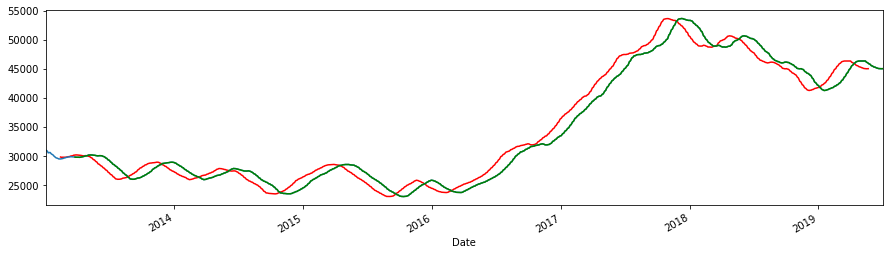

In [45]:
prices['005930.KS'].rolling(60, center=True).mean().plot(figsize=(15,4), color="red")
prices['005930.KS'].rolling(60, min_periods=3).mean().plot()
prices['005930.KS'].rolling(60).mean().plot(color='Green')

##  03 삼성전자의 이동평균선 생성
pd.Series.rolling()

In [47]:
import pandas as pd
price_df = prices['005930.KS']
price_df = pd.DataFrame(price_df)
price_df.columns = ['Close']
price_df.head(3)

,Close
Date,
2013-01-02,31520.0
2013-01-03,30860.0
2013-01-04,30500.0


In [48]:
import numpy as np
price_df['15d'] = np.round(price_df['Close'].rolling(15).mean(),2)
price_df['40d'] = np.round(price_df['Close'].rolling(40).mean(),2)
price_df['15d-40d'] = price_df['15d'] - price_df['40d']
price_df.tail(5)

,Close,15d,40d,15d-40d
Date,,,,
2019-06-26,45700.0,44780.00,44338.75,441.25
2019-06-27,46500.0,44953.33,44342.50,610.83
2019-06-28,47000.0,45140.00,44358.75,781.25
2019-07-01,46600.0,45260.00,44365.00,895.00
2019-07-02,46550.0,45373.33,44370.00,1003.33


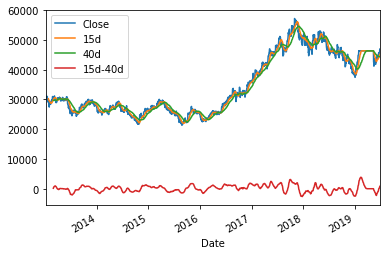

In [49]:
%matplotlib inline
price_df.plot()

In [50]:

price_df.head(3)

,Close,15d,40d,15d-40d
Date,,,,
2013-01-02,31520.0,NaN,NaN,NaN
2013-01-03,30860.0,NaN,NaN,NaN
2013-01-04,30500.0,NaN,NaN,NaN


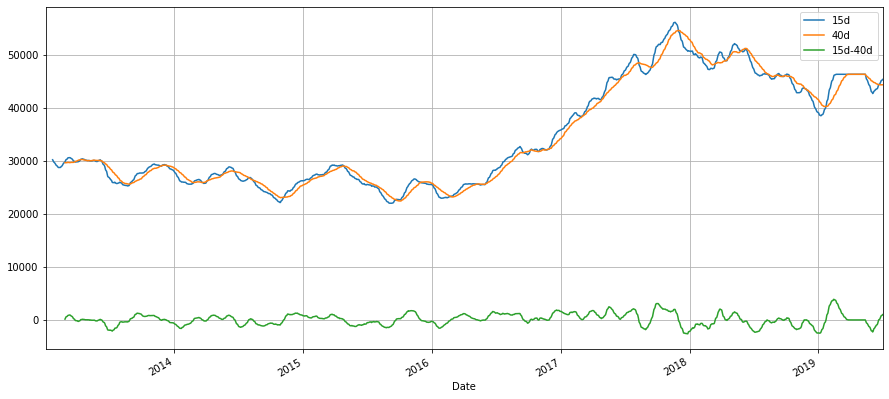

In [51]:
%matplotlib inline
# price_df['Close'].plot(grid = True, figsize = (15, 7))
price_df['15d'].plot(grid = True, figsize = (15, 7))
price_df['40d'].plot(grid = True)
price_df['15d-40d'].plot(grid = True)

import matplotlib.pyplot as plt
plt.legend()

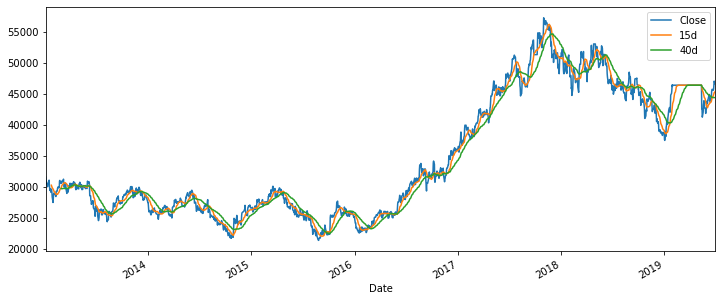

In [52]:
price_df.iloc[:, :3].plot(figsize=(12,5))

## 04 매매 시점 데이터 생성하기
np.where(조건문, True 일떄 값, False 일떄 값)

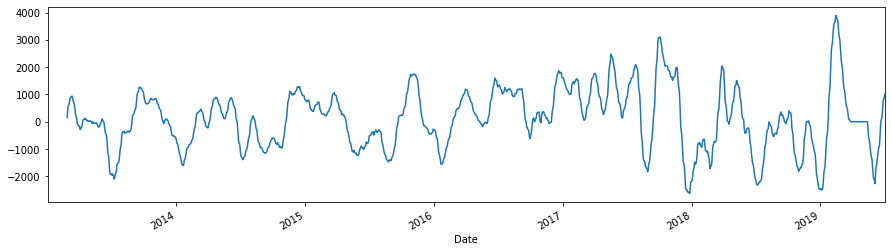

In [53]:
price_df['15d-40d'].plot(figsize=(15,4))

In [54]:
X = 100
price_df['Stance'] = np.where(price_df['15d-40d']> X,  1, 0)
price_df['Stance'] = np.where(price_df['15d-40d']< -X, -1, price_df['Stance'])
price_df['Stance'].value_counts()

 1    817
-1    645
 0    220
Name: Stance, dtype: int64

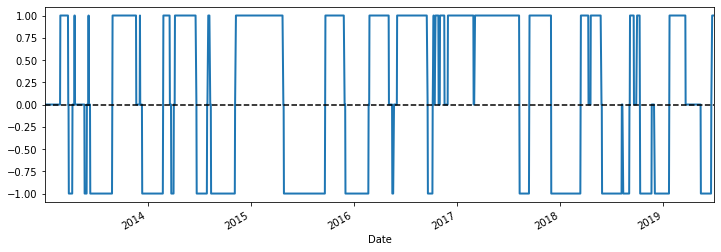

In [55]:

price_df['Stance'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

### 05 SMAC_Strategy (이동평균선 전략)으로 인한 수익률 데이터 생성
주가를 로그 수익률로 변환한다 : 복리공식에 비해 계산의 용이성

np.shift()
np.log()

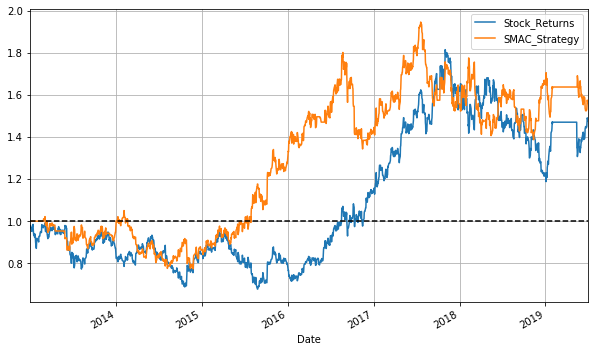

In [56]:
# 로그수익률
price_df['Stock_Returns'] = np.log(price_df['Close'] / price_df['Close'].shift(1))
price_df['SMAC_Strategy'] = price_df['Stock_Returns'] * price_df['Stance'].shift(1)
price_df[['Stock_Returns','SMAC_Strategy']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

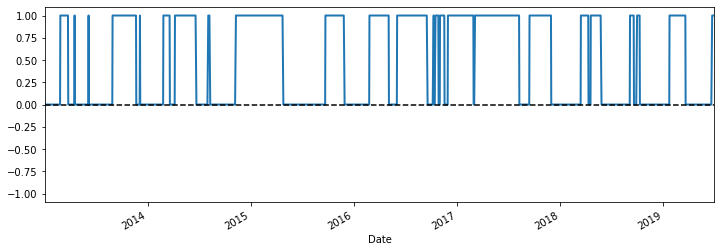

In [57]:
price_df['Stance2'] = np.where(price_df['15d-40d']>X,  1, 0)
price_df['Stance2'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

In [58]:
price_df['Stock_Returns']  = np.log(price_df['Close']  / price_df['Close'].shift(1))    
price_df['SMAC_Strategy2'] = price_df['Stock_Returns'] * price_df['Stance2'].shift(1)

In [59]:
# price_df_log
price_df_log = price_df[['Stock_Returns','SMAC_Strategy','SMAC_Strategy2']].cumsum().apply(np.exp)
price_df_log.head(3)

,Stock_Returns,SMAC_Strategy,SMAC_Strategy2
Date,,,
2013-01-02,NaN,NaN,NaN
2013-01-03,0.979061,1.0,1.0
2013-01-04,0.967640,1.0,1.0


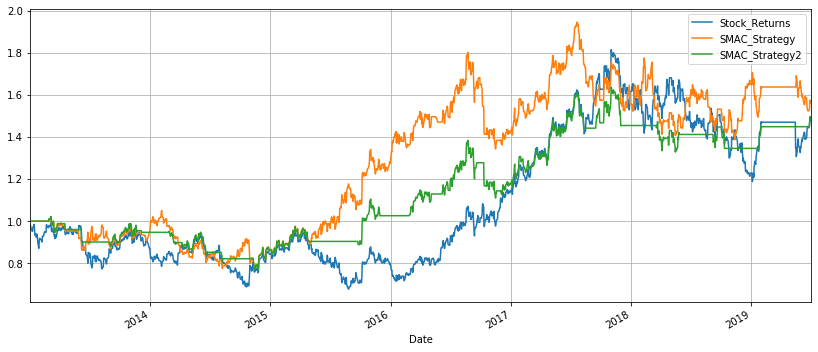

In [60]:
price_df_log.plot(grid = True, figsize = (14,6))

In [61]:
price_df.tail()

,Close,15d,40d,15d-40d,Stance,Stock_Returns,SMAC_Strategy,Stance2,SMAC_Strategy2
Date,,,,,,,,,
2019-06-26,45700.0,44780.00,44338.75,441.25,1,0.002191,0.002191,1,0.002191
2019-06-27,46500.0,44953.33,44342.50,610.83,1,0.017354,0.017354,1,0.017354
2019-06-28,47000.0,45140.00,44358.75,781.25,1,0.010695,0.010695,1,0.010695
2019-07-01,46600.0,45260.00,44365.00,895.00,1,-0.008547,-0.008547,1,-0.008547
2019-07-02,46550.0,45373.33,44370.00,1003.33,1,-0.001074,-0.001074,1,-0.001074


## 06 기간별 수익률 계산하기


로그 수익률 계산하기

In [62]:
price_df.SMAC_Strategy['2018-06'].sum()

0.08325298330378463

In [1]:
price_df.SMAC_Strategy2['2019-02'].sum()

NameError: name 'price_df' is not defined

In [11]:
# 저장된 CSV 파일을 사용한다

import pandas as pd
price = pd.read_csv('./stock.csv')
price = price.set_index('Date')
price.index = pd.DatetimeIndex(price.index)
price.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-07,51800.0,50500.0,51800.0,50600.0,13590016.0,50600.0
2018-06-08,50400.0,49600.0,50200.0,49650.0,16951706.0,49650.0
2018-06-11,50300.0,49350.0,49750.0,49900.0,10496083.0,49900.0


In [ ]:
!conda install libpython m2w64-toolchain –c msys2

!pip install pystan

!pip install fbprophet



### 6 Predict the Stock
FB prophet




1 fb - prophet 모듈의 활용
https://research.fb.com/prophet-forecasting-at-scale/

In [ ]:
!pip install fbprophet

In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [12]:
df = price.reset_index()
df.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-06-01,44900.0,44400.0,44860.0,44680.0,9753500.0,11621.890625
1,2017-06-02,45960.0,45000.0,45060.0,45960.0,12488750.0,11954.835938
2,2017-06-05,46360.0,45720.0,46040.0,45940.0,7599400.0,11949.635742
3,2017-06-07,46500.0,45240.0,46500.0,45300.0,13729400.0,11783.163086
4,2017-06-08,45580.0,45000.0,45000.0,45160.0,13978750.0,11746.746094


In [13]:
df  = df[['Date', 'Close']]
df.head()

,Date,Close
0,2017-06-01,44680.0
1,2017-06-02,45960.0
2,2017-06-05,45940.0
3,2017-06-07,45300.0
4,2017-06-08,45160.0


In [14]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2017-06-01,44680.0
1,2017-06-02,45960.0
2,2017-06-05,45940.0
3,2017-06-07,45300.0
4,2017-06-08,45160.0


In [15]:
df['y']    = np.log(df['y'])
df.head()

,ds,y
0,2017-06-01,10.707281
1,2017-06-02,10.735527
2,2017-06-05,10.735091
3,2017-06-07,10.721062
4,2017-06-08,10.717967


In [16]:
m = Prophet(yearly_seasonality = True)
m

In [17]:
m.fit(df)
print('done')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


done


### 03 예측 데이터 생성하기
df_predict

In [18]:
num_days = 10
future   = m.make_future_dataframe(periods = num_days)
future[:10]

,ds
0,2017-06-01
1,2017-06-02
2,2017-06-05
3,2017-06-07
4,2017-06-08
5,2017-06-09
6,2017-06-12
7,2017-06-13
8,2017-06-14
9,2017-06-15


In [19]:
forecast = m.predict(future)
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-01,10.597062,10.681889,10.729448,10.597062,10.597062,0.109230,0.109230,0.109230,-0.018521,-0.018521,-0.018521,0.127751,0.127751,0.127751,0.0,0.0,0.0,10.706292
1,2017-06-02,10.600427,10.685695,10.734175,10.600427,10.600427,0.108508,0.108508,0.108508,-0.021523,-0.021523,-0.021523,0.130031,0.130031,0.130031,0.0,0.0,0.0,10.708935
2,2017-06-05,10.610525,10.701941,10.750273,10.610525,10.610525,0.115189,0.115189,0.115189,-0.019025,-0.019025,-0.019025,0.134214,0.134214,0.134214,0.0,0.0,0.0,10.725713


In [20]:

forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



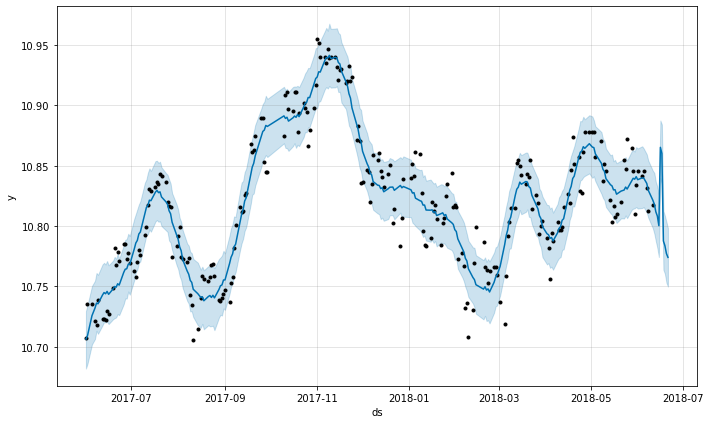

In [21]:
plt      = m.plot(forecast)
plt.show()

In [59]:
forecast.yhat[:10]

0    10.706292
1    10.708935
2    10.725713
3    10.732031
4    10.736182
5    10.735570
6    10.742900
7    10.744880
8    10.743881
9    10.745838
Name: yhat, dtype: float64

In [60]:
forecast['Close'] = round(np.exp(forecast.yhat), 2)

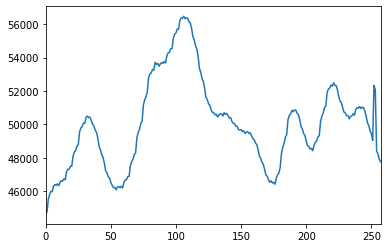

In [61]:
forecast.Close.plot()

In [62]:
df_predict = forecast.filter(['ds', 'Close'])
df_predict = df_predict.set_index('ds')
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 258 entries, 2017-06-01 to 2018-06-21
Data columns (total 1 columns):
Close    258 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


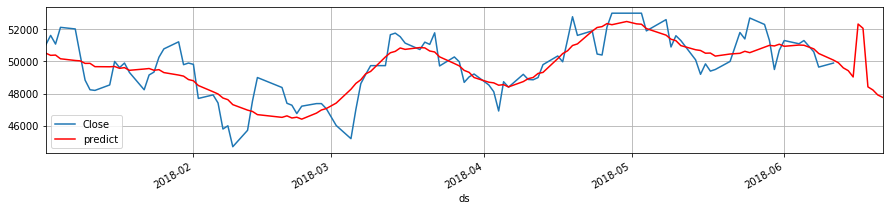

In [63]:
price.Close['2018'].plot(label='Close', figsize=(15,3), legend=True)
df_predict.Close['2018'].plot(label='predict', grid=True, color='red', legend=True)

### 03 결과 보고서 시각화

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



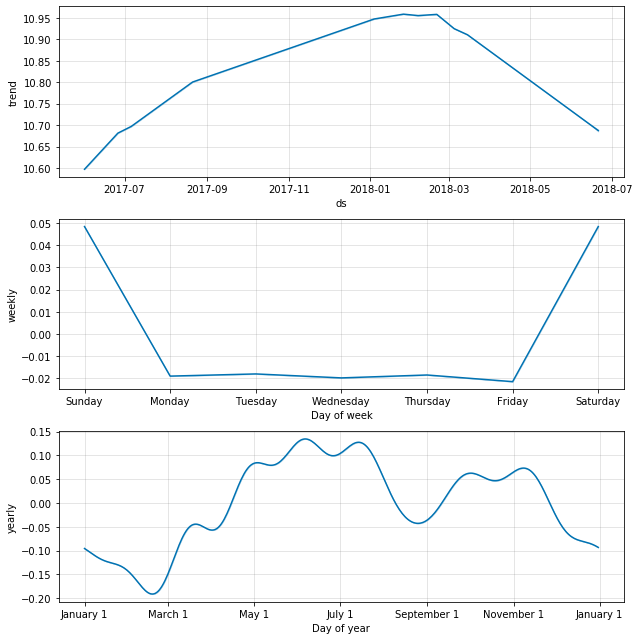

In [22]:
plt = m.plot_components(forecast)
plt.show()

In [23]:
import requests                  # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup    # HTML을 파싱하는 모듈

# 웹 페이지를 가져온 뒤 BeautifulSoup 객체로 만듦
response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', { 'class': 'table_develop3' })    # <table class="table_develop3">을 찾음
data = []                            # 데이터를 저장할 리스트 생성
for tr in table.find_all('tr'):      # 모든 <tr> 태그를 찾아서 반복(각 지점의 데이터를 가져옴)
    tds = list(tr.find_all('td'))    # 모든 <td> 태그를 찾아서 리스트로 만듦
                                     # (각 날씨 값을 리스트로 만듦)
    for td in tds:                   # <td> 태그 리스트 반복(각 날씨 값을 가져옴)
        if td.find('a'):             # <td> 안에 <a> 태그가 있으면(지점인지 확인)
            point = td.find('a').text    # <a> 태그 안에서 지점을 가져옴
            temperature = tds[5].text    # <td> 태그 리스트의 여섯 번째(인덱스 5)에서 기온을 가져옴
            humidity = tds[9].text       # <td> 태그 리스트의 열 번째(인덱스 9)에서 습도를 가져옴
            data.append([point, temperature, humidity])    # data 리스트에 지점, 기온, 습도를 추가

data    # data 표시. 주피터 노트북에서는 print를 사용하지 않아도 변수의 값이 표시됨

with open('weather.csv', 'w') as file:    # weather.csv 파일을 쓰기 모드로 열기
    file.write('point,temperature,humidity\n')                  # 컬럼 이름 추가
    for i in data:                                              # data를 반복하면서

SyntaxError: unexpected EOF while parsing (<ipython-input-23-ee1d3fb19b4a>, line 24)